In [0]:
#Flow chart of extraction 

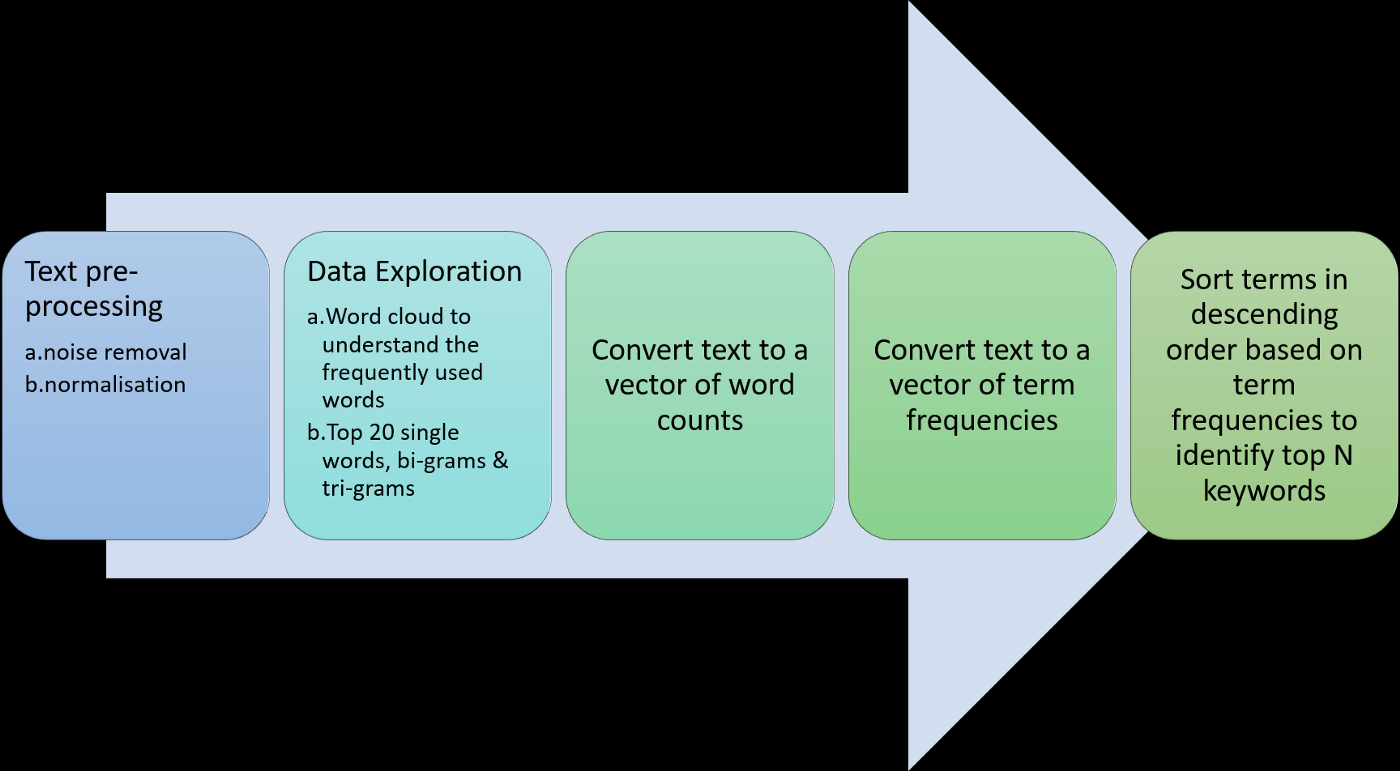

In [0]:
import pandas as pd
import numpy as np
import os
import re
import time


In [0]:
path_to_drive = "drive/My Drive"
path_to_data = os.path.join(path_to_drive,"chatbot/data")
data_filename = "idsngdocumentation.docx"
path_to_kernel = os.path.join(path_to_drive,"chatbot/1_important_keywords")

In [0]:
!pip install python-docx

In [0]:
import docx
def getText(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return '\n'.join(fullText)
data = getText(os.path.join(path_to_data,data_filename)) 

# print(data)

In [0]:
#cleaning examples from the text
data = re.sub('example.*?\s(?=Created with the Personal Edition of HelpNDoc)',' ',data)

In [0]:
#splitting data into list of docs lets assume

In [0]:
#creating dataset
dataset = pd.DataFrame()
dataset['text'] = data.split('Created with the Personal Edition of HelpNDoc')

dataset['word_count'] = dataset['text'].apply(lambda x :len(str(x).split(" ")))
dataset.head()

,text,word_count
0,"IDesignSpec (c) 2007-2020 Agnisys, Inc.\n\n\n\...",16
1,: \n\nRelease Notes\nThis section contains rel...,14
2,: \n\nVer 6.32.0.0\nv6.32.0.0 Major Release\n(...,1251
3,: \n\nPrior Release Notes\nThis section contai...,9
4,": \n\nVer 6.24.x.x\nv6.24.0.0\n(August 7th, 20...",1453


In [0]:
dataset.shape

(433, 2)

In [0]:
#descriptive statistics of word counts
dataset.word_count.describe()

count      433.000000
mean       627.073903
std       1314.863272
min          2.000000
25%         90.000000
50%        206.000000
75%        617.000000
max      12457.000000
Name: word_count, dtype: float64

In [0]:
#identifying most common words
freq = pd.Series(" ".join(dataset['text']).split()).value_counts()[:20].keys().tolist()
print(freq)

['the', 'in', 'to', 'is', 'of', ':', 'and', '=', 'for', '.', 'a', 'be', 'register', 'can', 'property', 'are', 'The', 'on', 'will', 'with']


In [0]:
#identifying uncommon words
freq1 = pd.Series(" ".join(dataset['text']).split()).value_counts()[-40:]
freq1

"C:\Users\User_Name\Documents\.ids\Cblock.h"    1
Identifies                                      1
'h%h\n",start_packet),                          1
.........                                       1
mapping>”                                       1
.reg1_enb(reg1_enb),                            1
although                                        1
,writing                                        1
specialization.                                 1
$boardA_obj]                                    1
"basic_blk_Mem1_Mem1");                         1
/block(block_name)/reg(reg_name1)               1
'Force'                                         1
w0crs                                           1
re-calculated                                   1
Section2_Reg3_R1_r                              1
Register1_Field1_wr_pulse,                      1
{Reg1_F1_q}                                     1
Overriding                                      1
[get_id                                         1


In [0]:
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
nltk.download('wordnet')
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

lem = WordNetLemmatizer()
stem = PorterStemmer()

word = "alias"

print("lemmatization:",lem.lemmatize(word,'v'))
print("stemming:",stem.stem(word))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
lemmatization: alias
stemming: alia


In [0]:
#stopwords :: list
stop_words = set(stopwords.words("english"))

#adding custom words
# stop_words = stop_words.union(freq1)


In [0]:


def preprocess(text):
  #removing punctauations
  # text = re.sub('[^a-zA-Z]',' ',text)
  text = re.sub(' \S+[._]\S+ ',' ',text)
  text = re.sub('[^a-zA-Z]',' ',text)
  # text = re.sub('',' ',text)
  # text = re.sub('',' ',text)
  # text = re.sub('',' ',text)
  #converts to lower
  text = text.lower()
  #removing tags
  text = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ", text)
  #removing special characters and digits
  text = re.sub("(\\d|\\W)+"," ",text)
  
  #lemmatization
  lem = WordNetLemmatizer()
  text = [lem.lemmatize(w) for w in text.split(" ") if not w in stop_words]
  text = " ".join(text)
  return text
  

#lets preprocess text data in dataset
dataset["processed"] = dataset.text.apply(lambda x: preprocess(x)) 


In [0]:
#head dataset
dataset.head()

,text,word_count,processed
0,"IDesignSpec (c) 2007-2020 Agnisys, Inc.\n\n\n\...",16,idesignspec c agnisys inc table content copyri...
1,: \n\nRelease Notes\nThis section contains rel...,14,release note section contains release note fo...
2,: \n\nVer 6.32.0.0\nv6.32.0.0 Major Release\n(...,1251,ver v major release january st note withdrawn...
3,: \n\nPrior Release Notes\nThis section contai...,9,prior release note section contains earlier r...
4,": \n\nVer 6.24.x.x\nv6.24.0.0\n(August 7th, 20...",1453,ver x x v august th idesignspec id rtl enhanc...


In [0]:
#identifying most common words
freq = pd.Series(" ".join(dataset['processed']).split()).value_counts()[:20].keys().tolist()
print(freq)

['register', 'reg', 'block', 'property', 'field', 'id', 'output', 'uvm', 'name', 'value', 'user', 'signal', 'file', 'write', 'bus', 'end', 'read', 'data', 'generated', 'type']


In [0]:
#fetching corpus and vie corpus item
corpus = dataset.processed.to_list() #processed
corpus[234]

' multiple bus domain multiple bus domain compatible id version verilog vhdl alt ralf systemrdl id user specify multiple bus domain block chip resides various domain generally described bus domain template see typically top document domain enumerated template used throughout document say block chip domain following bus domain template inserted bus domain button clicked bus domain name name domain generated output address unit address unit used address domain note first row address unit column take id configure setting address unit value description static text description domain bus bus associated domain bus one following amba ahb amba axi amba apb ocp avalon proprietary note first domain specified bus domain table default domain first row bus column need match id configure setting bus value creating bus domain following example show bus domain template idsword idsexcel id description couple new property introduced specify block chip reg particular domain property block chip level eg a

# Data Exploration

# Text Preparation

In [0]:
import string
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import re, string, unicodedata
from collections import defaultdict
from nltk.corpus import wordnet as wn

def Normalize(text):
    remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
    #word tokenization
    word_token = nltk.word_tokenize(text.lower().translate(remove_punct_dict)) #.translate(remove_punct_dict)
    # word_token = [ w for w in word_token if "_" not in w]
    #remove ascii
    new_words = []
    for word in word_token:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    
    #Remove tags
    rmv = []
    for w in new_words:
        text=re.sub("&lt;/?.*?&gt;","&lt;&gt;",w)
        rmv.append(text)
        
    #pos tagging and lemmatization
    tag_map = defaultdict(lambda : wn.NOUN)
    tag_map['J'] = wn.ADJ
    tag_map['V'] = wn.VERB
    tag_map['R'] = wn.ADV
    lmtzr = WordNetLemmatizer()
    lemma_list = []
    rmv = [i for i in rmv if i]
    for token, tag in nltk.pos_tag(rmv):
        lemma = lmtzr.lemmatize(token, tag_map[tag[0]])
        lemma_list.append(lemma)
    return lemma_list



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [0]:
wordfreq =  sorted(wordfreq.items(), key= lambda x :x[1], reverse = True)

Kmeans Clustering

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer( tokenizer = Normalize,stop_words='english', max_df=0.7) #
doc_vec = vectorizer.fit_transform(corpus)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['far', 'make', 'u'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [0]:
tdm = pd.DataFrame(doc_vec.toarray().transpose(), index = vectorizer.get_feature_names(), columns= [i for i in range(len(corpus))])
arr = np.array(tdm)

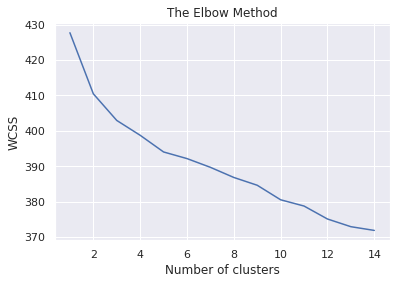

In [0]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

%matplotlib inline
def plot_elbow_graph(arr,km_init="k-means++"):
    """ helps in finding optimal no. of cluster"""
    wcss = []
    for i in range(1, 15):
        kmeans = KMeans(n_clusters = i, init = km_init, random_state = 42,max_iter = 100, n_init = 5) #random,k-means++
        kmeans.fit(arr)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, 15), wcss)
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()
    
plot_elbow_graph(arr=arr)

In [0]:
#lets see cluster at k=2
from collections import defaultdict
clustering = defaultdict(list)
terms = vectorizer.get_feature_names()
model = KMeans(n_clusters=6, init="k-means++", max_iter = 100, n_init=10)
model.fit(arr)

for idx, label in enumerate(model.labels_):
    clustering[label].append(terms[idx]) 

In [0]:
for i in range(0,6):
  print("cluster "+str(i+1)+"\n",clustering[i])

cluster 1
 ['add', 'agnisys', 'appropriate', 'automatically', 'bar', 'button', 'check', 'click', 'configuration', 'configure', 'create', 'csv', 'custom', 'directory', 'display', 'document', 'download', 'editor', 'error', 'excel', 'feature', 'file', 'follow', 'formal', 'format', 'generate', 'idesignspec', 'idsbatch', 'import', 'list', 'make', 'new', 'note', 'open', 'option', 'param', 'preview', 'project', 'require', 'run', 'select', 'set', 'sheet', 'specification', 'spreadsheet', 'start', 'step', 'tcl', 'tool', 'variant', 'various', 'version', 'view', 'window', 'word', 'xml', 'xquery']
cluster 2
 ['define', 'id', 'output', 'parameter', 'property', 'sequence', 'template', 'user', 'uvm', 'variable']
cluster 3
 ['license']
cluster 4
 ['access', 'address', 'alt', 'amba', 'array', 'arv', 'assign', 'axi', 'b', 'base', 'begin', 'bit', 'board', 'bug', 'bus', 'c', 'case', 'change', 'chip', 'class', 'clk', 'clock', 'code', 'command', 'component', 'contain', 'counter', 'coverage', 'data', 'decode'

In [0]:
# saving cluster to a sheet with given n centres
def cluster(min=4,max=15,directory=str(time.time()).split('.')[0], km_init = "k-means++"):
    terms = vectorizer.get_feature_names()
    for n in range(min,max):
        model = KMeans(n_clusters=n, init=km_init, max_iter = 100, n_init=10)
        model.fit(doc_vec.transpose())

        clustering = collections.defaultdict(list)

        for idx, label in enumerate(model.labels_):
            clustering[label].append(terms[idx]) 
        if not os.path.isdir(directory):
            os.mkdir(directory)
        filename = "df_"+str(n)

        df = pd.DataFrame(columns = ('cluster_n','keywords','no.of words'))

        for key, value in clustering.items():
            cluster = key
            keyword =  ' '.join(value)
            length = len(value)

            df = df.append({'cluster_n':cluster,'keywords':str(keyword),'no.of words':length},ignore_index=True)
        df.to_excel(os.path.join(directory,filename+'.xlsx'))

In [0]:
cluster(min=2,max=8, km_init="k-means++", directory = "kmeans_per_dictsdsa") # give directory == directoryname  , km_init = ['random' or 'k-means++']
"""It will save all cluster with in range given in min and max, to directory name given or bydefault timestamp directory"""